In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.calibration import LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report

In [3]:
df_test_full = pd.read_csv("test-full.csv")
df_train = pd.read_csv("train.csv")
y = df_train["Cover_Type"]
X = df_train.drop(["Cover_Type"], axis=1)

In [25]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)#, stratify=y)

In [26]:


le = LabelEncoder()
# y_train = le.fit_transform(y_train)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# y_pred = le.inverse_transform(y_pred)

In [5]:
y_pred = le.inverse_transform(y_pred)
res = pd.DataFrame(le.inverse_transform(y_pred), columns=["Cover_Type"])
res = res.rename_axis('Id')
res = res.set_index(res.index +1)
current_date = datetime.now().strftime("%H.%M.%S-%Y-%m-%d")
res.to_csv(f"Output/Submission_{current_date}.csv")

ValueError: y contains previously unseen labels: [7]

In [6]:


clf = xgb.XGBRFClassifier()

le = LabelEncoder()
y = le.fit_transform(y)

clf.fit(X, y)
y_pred = clf.predict(X)
# y_pred = le.inverse_transform(y_pred)

In [28]:



print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       543
           1       0.74      0.83      0.78       506
           2       0.87      0.88      0.88       508
           3       0.96      0.96      0.96       552
           4       0.96      0.89      0.93       609
           5       0.89      0.87      0.88       523
           6       0.96      0.96      0.96       539

    accuracy                           0.89      3780
   macro avg       0.89      0.89      0.89      3780
weighted avg       0.89      0.89      0.89      3780



[[440  73   0   0  11   2  17]
 [ 87 418   9   0  38   8   5]
 [  0   2 446  14   7  41   0]
 [  0   0   9 530   0  11   0]
 [  1  10   4   0 545   7   0]
 [  0   3  40   8   4 454   0]
 [ 15   0   0   0   4   0 517]]


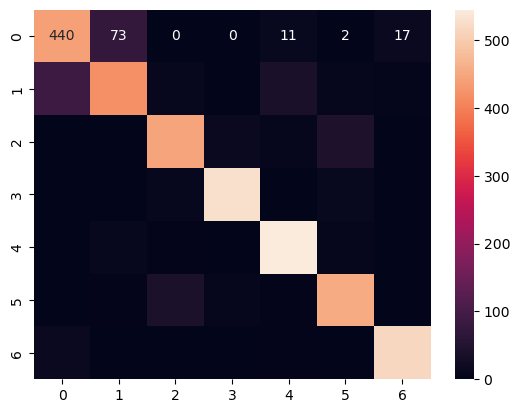

In [29]:

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt="d")
print(cf_matrix)

## Random Forest

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.40, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=.50, stratify=y_test)

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=90)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=90)

In [224]:
rfc.score(X_test, y_test)

0.8783068783068783

In [230]:
rfc.score(X_val, y_val)

0.8601190476190477

In [244]:
X_train_test = pd.concat([X_train, X_test])
y_train_test = np.concatenate([y_train, y_test])

In [257]:
np.linspace(50,150, 11, dtype=int)

array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150])

In [258]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators" :np.linspace(50,150, 11, dtype=int),
    # "max_depth" : [5, 8, 10]
}

gscv = GridSearchCV(RandomForestClassifier(), params, verbose=3, cv=5)
gscv.fit(X_train_test, y_train_test)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...................n_estimators=50;, score=0.858 total time=   1.6s
[CV 2/5] END ...................n_estimators=50;, score=0.864 total time=   1.0s
[CV 3/5] END ...................n_estimators=50;, score=0.873 total time=   1.0s
[CV 4/5] END ...................n_estimators=50;, score=0.877 total time=   1.0s
[CV 5/5] END ...................n_estimators=50;, score=0.877 total time=   1.0s
[CV 1/5] END ...................n_estimators=60;, score=0.857 total time=   1.2s
[CV 2/5] END ...................n_estimators=60;, score=0.862 total time=   1.2s
[CV 3/5] END ...................n_estimators=60;, score=0.879 total time=   1.2s
[CV 4/5] END ...................n_estimators=60;, score=0.874 total time=   1.2s
[CV 5/5] END ...................n_estimators=60;, score=0.883 total time=   1.3s
[CV 1/5] END ...................n_estimators=70;, score=0.857 total time=   1.5s
[CV 2/5] END ...................n_estimators=70;

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150])},
             verbose=3)

In [276]:
impo = gscv.best_estimator_.feature_importances_
np.argsort(impo)[::-1]

array([ 1,  0,  6, 10,  4, 14,  5,  7,  2,  8,  9,  3, 24, 13, 52, 11, 53,
       17, 18, 54, 44, 16, 27, 31, 43, 26, 37, 47, 36, 46, 12, 38, 25, 20,
       45, 49, 34, 15, 19, 30, 28, 32, 33, 51, 40, 42, 48, 41, 50, 22, 35,
       23, 39, 29, 21])

In [130]:
predict_t=rfc.predict(df_test_full)

In [141]:
submission = pd.DataFrame({'Id': df_test_full.index+1,
                       'Cover_Type': predict_t + 1})
submission.head()

,Id,Cover_Type
0,1,5
1,2,5
2,3,2
3,4,5
4,5,5


In [143]:
submission.to_csv('submission.csv', index=False)    

## 2 Models 1-2 & 3-4-5-6

### Load and split the data

In [132]:
df_train.Cover_Type.value_counts()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

In [133]:
X2 = df_train.copy()
X2["under2"] = (X2["Cover_Type"] < 3).astype(int)

In [138]:
# Split between cover type >2 and <=2
# 1 -2
X2_under = X2.where(X2["under2"] == 1)
X2_under.dropna(inplace=True)
X2_under = X2_under.astype(int) # @TODO c'est bizarre

y2_under = X2_under["Cover_Type"]
X2_under = X2_under.drop(["under2", "Cover_Type"], axis=1)

# 3-4-5-6
X2_above = X2.where(X2["under2"] == 0)
X2_above.dropna(inplace=True)
X2_above = X2_above.astype(int) # @TODO c'est bizarre

y2_above = X2_above["Cover_Type"]
X2_above = X2_above.drop(["under2", "Cover_Type"], axis=1)

In [139]:
y2 = X2["under2"]
X2 = X2.drop(["under2", "Cover_Type"], axis=1)

### 1st model to separete betwen under or above 2

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=42, stratify=y2)

model = xgb.XGBClassifier(n_estimators=200, max_depth=15)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2700
           1       0.97      0.93      0.95      1080

    accuracy                           0.97      3780
   macro avg       0.97      0.96      0.96      3780
weighted avg       0.97      0.97      0.97      3780



<Axes: >

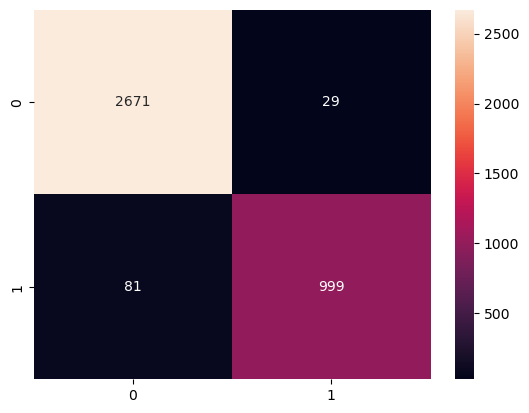

In [54]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt="d")

### 2nd model to predict in each model

#### 1. Cover Type 1 and 2

In [142]:
Xu_train, Xu_test, yu_train, yu_test = train_test_split(X2_under, y2_under, test_size=0.25, random_state=42, stratify=y2_under)

le = LabelEncoder()
yu_train = le.fit_transform(yu_train)

model = xgb.XGBClassifier(n_estimators=200, max_depth=15)
model.fit(Xu_train, yu_train)
y2u_pred = model.predict(Xu_test)
y2u_pred = le.inverse_transform(y2u_pred)

              precision    recall  f1-score   support

           1       0.84      0.85      0.85       540
           2       0.85      0.84      0.84       540

    accuracy                           0.85      1080
   macro avg       0.85      0.85      0.85      1080
weighted avg       0.85      0.85      0.85      1080



<Axes: >

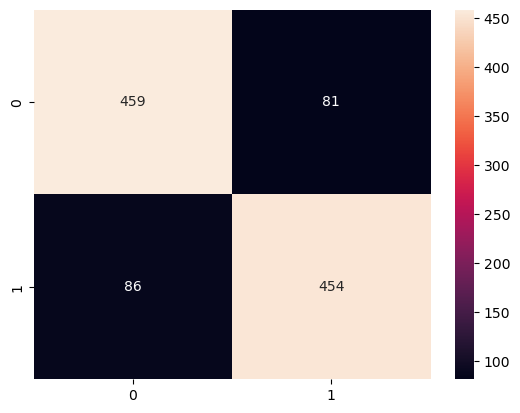

In [143]:
print(classification_report(yu_test, y2u_pred))
cf_matrix = confusion_matrix(yu_test, y2u_pred)
sns.heatmap(cf_matrix, annot=True, fmt="d")

#### 2. Cover Type 3, 4, 5, 6

In [144]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(X2_above, y2_above, test_size=0.25, random_state=42, stratify=y2_above)

le = LabelEncoder()
ya_train = le.fit_transform(ya_train)

model = xgb.XGBClassifier(objective="multi:softmax")
model.fit(Xa_train, ya_train)
y2a_pred = model.predict(Xa_test)
y2a_pred = le.inverse_transform(y2a_pred)

              precision    recall  f1-score   support

           3       0.92      0.89      0.90       540
           4       0.96      0.98      0.97       540
           5       0.97      0.99      0.98       540
           6       0.89      0.89      0.89       540
           7       1.00      1.00      1.00       540

    accuracy                           0.95      2700
   macro avg       0.95      0.95      0.95      2700
weighted avg       0.95      0.95      0.95      2700



<Axes: >

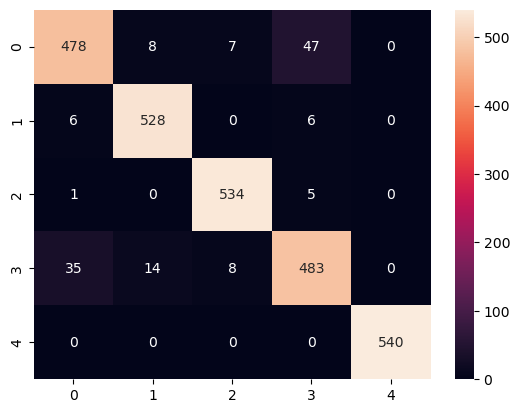

In [145]:
print(classification_report(ya_test, y2a_pred))
cf_matrix = confusion_matrix(ya_test, y2a_pred)
sns.heatmap(cf_matrix, annot=True, fmt="d")

### Reconstruct prediction

In [146]:
final_pred = np.concatenate([y2u_pred, y2a_pred]).astype(int)
final_pred

array([1, 2, 2, ..., 4, 6, 6])

In [147]:
final_X = pd.concat([Xu_test, Xa_test])
final_X["Cover_Type"] = final_pred
final_X

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2038,206094,3237,103,5,30,-2,6122,229,233,138,...,0,0,0,0,0,0,0,0,0,1
2572,246282,2762,254,16,95,19,1998,181,249,205,...,0,0,0,0,0,0,0,0,0,2
3925,558985,2599,219,28,42,28,1581,178,253,198,...,0,0,0,0,0,0,0,0,0,2
2275,263924,2902,309,7,418,104,1863,202,236,173,...,0,0,0,0,0,0,0,0,0,2
4299,107717,2812,354,27,234,96,3197,166,183,148,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8065,265424,2117,34,14,0,0,1231,217,207,122,...,0,0,0,0,0,0,0,0,0,4
10882,282546,2226,108,22,67,37,1487,251,209,75,...,0,0,0,0,0,0,0,0,0,6
8094,268649,2137,34,23,30,4,1183,210,184,99,...,0,0,0,0,0,0,0,0,0,4
12716,282950,2288,290,20,162,24,1752,159,233,212,...,0,0,0,0,0,0,0,0,0,6


In [150]:
submission = pd.DataFrame({'Id': final_X.Id,
                       'Cover_Type': final_X.Cover_Type})

submission.to_csv('Output/submission.csv', index=False)  

## Data

In [179]:
col = list(X.columns)[1:] + ["Cover_Type"]

In [180]:
data = pd.read_csv('covertype/covtype.data.gz', compression='gzip')
new_col = dict(zip(data.columns, col))
data = data.rename(columns=new_col)
data.insert(0, "Id", data.index)

In [182]:
y_vrai = data[["Id","Elevation", "Cover_Type"]]
y_vrai.head()

,Id,Elevation,Cover_Type
0,0,2590,5
1,1,2804,2
2,2,2785,2
3,3,2595,5
4,4,2579,2


In [197]:

# Supposons que df soit votre DataFrame initial et df_train soit votre DataFrame de train
# Remplacez 'ID' par le nom de votre colonne d'intérêt

# Fusionnez les DataFrames sur la colonne 'ID'
merged_df = pd.merge(y_vrai, df_train[['Id']], on='Id', how='inner')

# Sélectionnez uniquement les lignes de df qui ont les mêmes valeurs dans la colonne 'ID' que dans df_train
selected_rows = merged_df.drop_duplicates(subset='Id', keep='first')

# Affichez les lignes sélectionnées
print(selected_rows)
merged_df.describe()

           Id  Elevation  Cover_Type
0           5       2606           5
1          11       2742           2
2          14       2495           5
3          16       2517           5
4          19       2501           5
...       ...        ...         ...
15115  580950       2438           3
15116  580952       2442           3
15117  580976       2404           3
15118  580989       2455           3
15119  581005       2401           3

[15120 rows x 3 columns]


,Id,Elevation,Cover_Type
count,15120.000000,15120.000000,15120.000000
mean,267008.526389,2759.127646,3.704365
std,179261.722330,417.792967,2.058097
min,5.000000,1879.000000,1.000000
25%,103705.000000,2388.000000,2.000000
50%,276034.500000,2766.000000,3.000000
75%,398150.250000,3131.000000,6.000000
max,581005.000000,3850.000000,7.000000


In [196]:
# df_train.sort_values(by='Id', axis=1).head()
df_train[["Id", "Elevation", "Cover_Type"]].describe()

,Id,Elevation,Cover_Type
count,15120.000000,15120.000000,15120.000000
mean,267008.526389,2748.649934,4.000000
std,179261.722330,419.009589,2.000066
min,5.000000,1877.000000,1.000000
25%,103705.000000,2373.000000,2.000000
50%,276034.500000,2754.000000,4.000000
75%,398150.250000,3109.000000,6.000000
max,581005.000000,3850.000000,7.000000


In [207]:
df_train.sort_values(by='Id')["Cover_Type"]
merged_df["Cover_Type"]

0        5
1        2
2        5
3        5
4        5
        ..
15115    3
15116    3
15117    3
15118    3
15119    3
Name: Cover_Type, Length: 15120, dtype: int64

In [215]:
(df_train.sort_values(by='Id')["Cover_Type"].reset_index()["Cover_Type"]==merged_df["Cover_Type"]).mean()

0.7941798941798942

In [171]:
df_train[df_train["Id"]<5]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [170]:
df_test_full[df_test_full["Id"]<5]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0


# 2MODELS
Predictions based on 2 models
1. Classify between 1-2 and 3-4-5-6-7
2. For each class, find the cover_Type


In [223]:
from utils import *
def split_in_two_df(df: pd.DataFrame):
    if "under2" not in df.columns:
        # Split between cover type >2 and <=2
        df["under2"] = (df["Cover_Type"] < 3).astype(int)
    
    # 1 -2
    df_under = df.where(df["under2"] == 1)
    df_under.dropna(inplace=True)
    df_under = df_under.astype(int)  # @TODO c'est bizarre

    # 3-4-5-6-7
    df_above = df.where(df["under2"] == 0)
    df_above.dropna(inplace=True)
    df_above = df_above.astype(int)  # @TODO c'est bizarre

    return df, df_under, df_above


def get_X_y(df: pd.DataFrame, target_col=None):
    X = df.copy()
    if target_col == "under2":
        X.drop(["Cover_Type"], axis=1, inplace=True)
    elif target_col == "Cover_Type":
        X.drop(["under2"], axis=1, inplace=True)
    if target_col in X.columns:
        y = X[target_col]
        X.drop([target_col], axis=1, inplace=True)
        return X, y
    else:
        # X.drop(["under2", "Cover_Type"], axis=1, inplace=True)
        return X


def train_first_model(X, y, model, test_size=0.25, seed=42, startify=True):
    if startify:
        strf = y
    else:
        strf = None

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=seed, stratify=strf)

    model.fit(X, y)
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)

    return model


def train_second_model(X, y, model, test_size=0.25, seed=42, startify=True):
    if startify:
        strf = y
    else:
        strf = None
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=seed, stratify=strf)

    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    model.fit(X, le.fit_transform(y))
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # y_pred = le.inverse_transform(y_pred)

    return model



# Load training data
df_train = get_data_train()

# Split the data
df_train, df_train_under, df_train_above = split_in_two_df(df_train)
X_train_under, y_train_under = get_X_y(
    df_train_under, target_col='Cover_Type')
X_train_above, y_train_above = get_X_y(
    df_train_above, target_col='Cover_Type')
X_train, y_train = get_X_y(df_train, target_col='under2')

# Train first model
model = xgb.XGBClassifier(n_estimators=200, max_depth=15)
model1 = train_first_model(X_train, y_train, model)

# Train second model
model2u = xgb.XGBClassifier(n_estimators=200, max_depth=15)
model2u = train_second_model(
    X_train_under, y_train_under, model2u)

model2a = xgb.XGBClassifier(objective="multi:softmax")
model2a = train_second_model(
    X_train_above, y_train_above, model2a)

# Load Testing data
df_test = get_data_test()

X_test = get_X_y(df_test)
y1_pred = model1.predict(X_test)

X_test["under2"] = y1_pred

df_test1, df_test_under, df_test_above = split_in_two_df(X_test)
X_test_under = get_X_y(df_test_under)
X_test_under.drop(["under2"], axis=1, inplace=True)
X_test_above = get_X_y(df_test_above)
X_test_above.drop(["under2"], axis=1, inplace=True)

y2u_pred = model2u.predict(X_test_under)
y2a_pred = model2a.predict(X_test_above)

# Convert prediction into Dataframe
pred_under = pd.DataFrame({'Id': X_test_under.Id, 'Cover_Type': y2u_pred+1})
pred_above = pd.DataFrame({'Id': X_test_above.Id, 'Cover_Type': y2a_pred+3})

final_pred = pd.concat([pred_under, pred_above])
final_pred.to_csv(f"Output/Submission_pas_triee.csv", index=False)

# OTHER